Libralies

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

Constants

In [2]:
PATH_OF_TRAIN_DATA = os.path.dirname(os.path.abspath('eda.ipynb')) + '\\oil_gas_train\\'
PATH_OF_TEST_DATA = os.path.dirname(os.path.abspath('eda.ipynb')) + '\\oil_gas_train_test\\'

Download data

In [3]:
def download_data(path: str) -> pd.DataFrame:
    names_of_train_tables = os.listdir(path)
    # i do not want to append data to dataframe by parts, so i use dictionary at the beginning
    Container_for_dataframe = {"company_name": [], "rev": [], "date": [], "op_in": []}
    for name in names_of_train_tables:
        name_of_table = PATH_OF_TRAIN_DATA + name
        data = pd.read_excel(name_of_table)
        rev = data.iloc[28].tolist()[9:51]
        date = data.iloc[27].tolist()[9:51]
        op_in = data.iloc[42].tolist()[9:51]
        company_name = name[:-5]
        for i in range(len(rev)):
            Container_for_dataframe["company_name"].append(company_name)
            Container_for_dataframe["rev"].append(rev[i])
            Container_for_dataframe["date"].append(date[i])
            Container_for_dataframe["op_in"].append(op_in[i])
    DF = pd.DataFrame(Container_for_dataframe)
    #don't want to get null data
    DF = DF.loc[DF['rev'] != 0]
    return DF

Next, I see the format and properties of the data

In [4]:
Train_DF = download_data(PATH_OF_TRAIN_DATA)

In [5]:
Train_DF.shape

(1833, 4)

In [6]:
Train_DF.loc[Train_DF['company_name'] == "CRBO"]

,company_name,rev,date,op_in
532,CRBO,0.000280,2009-06-30,-0.006492
533,CRBO,0.000260,2009-09-30,-0.009773
534,CRBO,0.000202,2009-12-31,-0.007879
535,CRBO,0.100144,2010-03-31,0.087908
536,CRBO,1.412895,2011-03-31,-0.918040
537,CRBO,1.252889,2011-06-30,-1.983994
538,CRBO,3.834328,2011-09-30,-3.454983
539,CRBO,3.202888,2011-12-31,4.805017
540,CRBO,2.971000,2012-03-31,-0.626000
541,CRBO,2.495000,2012-06-30,-0.487000


In [7]:
Train_DF.head()

,company_name,rev,date,op_in
3,AMPY,61.863,2011-12-31,-32.289
4,AMPY,48.410,2012-03-31,2.342
5,AMPY,49.259,2012-06-30,4.064
6,AMPY,55.498,2012-09-30,3.674
7,AMPY,89.839,2012-12-31,20.680


In [8]:
Train_DF.groupby('company_name')['op_in'].max()

company_name
AMPY             56.431000
APA            2227.000064
AR              293.868992
BATL            110.428000
BCEI             55.931000
BRY             222.956992
BSM             170.716000
CDEV            101.254000
CHK             902.923072
CLR            1025.046976
CNX             485.319008
COG             354.459008
COP            5224.999936
CPE              83.321000
CRBO             18.751000
CRC             319.000000
CRK             101.681000
DEN             300.492000
DVN            1131.000064
EGY              43.863000
EOG            1395.547008
EQT             355.119008
ESTE             23.403000
FANG            420.000000
GDP              11.642000
HES            1228.999936
LONE             18.395000
LPI              95.067000
MCF              31.397000
MGY             106.174000
MNRL             14.362000
MRO            1680.000000
MTDR             89.190000
MUR             508.356992
NOG             390.875008
OAS             151.542000
OVV            

In [9]:
Train_DF.max()

company_name            ¦Ъ¦-¦¬¦¦¦-8
rev                    54174.998528
date            2020-06-30 00:00:00
op_in                   5224.999936
dtype: object

Most of data are concentrated within a few thousand

Text(0, 0.5, 'Counts')

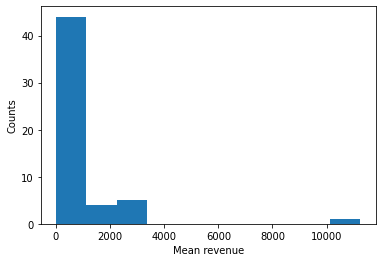

In [10]:
plt.hist(Train_DF.groupby('company_name')['rev'].mean())
plt.xlabel('Mean revenue')
plt.ylabel('Counts')


Most of them are concentrated within a few thousand, so I look at the smallest piece

Text(0.5, 0, 'Mean revenue')

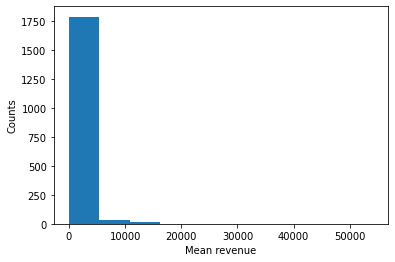

In [11]:
plt.hist(Train_DF['rev'])
plt.ylabel('Counts')
plt.xlabel('Mean revenue')

Something vaguely resembles a normal distribution, but this is clearly not it

Text(0.5, 0, 'Mean revenue')

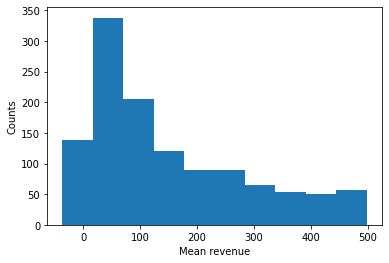

In [12]:
plt.hist(Train_DF['rev'].loc[Train_DF['rev'] < 500])
plt.ylabel('Counts')
plt.xlabel('Mean revenue')

In [13]:
Train_DF.rev.median()

244.555008

In [14]:
Train_DF.op_in.median()

35.59656

It also reminds a normal distribution, but it is asymmetrical and with large tails

Text(0, 0.5, 'Counts')

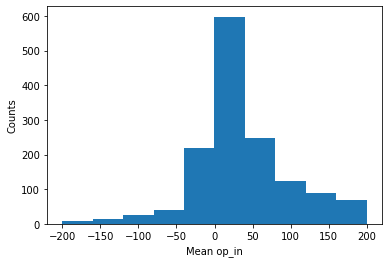

In [15]:
plt.hist(Train_DF['op_in'].loc[abs(Train_DF['op_in']) < 200 ])
plt.xlabel('Mean op_in')
plt.ylabel('Counts')

In [16]:
Train_DF

,company_name,rev,date,op_in
3,AMPY,61.863000,2011-12-31,-32.289
4,AMPY,48.410000,2012-03-31,2.342
5,AMPY,49.259000,2012-06-30,4.064
6,AMPY,55.498000,2012-09-30,3.674
7,AMPY,89.839000,2012-12-31,20.680
...,...,...,...,...
2051,¦Ъ¦-¦¬¦¦¦-8,236.260000,2019-06-30,19.823
2052,¦Ъ¦-¦¬¦¦¦-8,176.942000,2019-09-30,-18.356
2053,¦Ъ¦-¦¬¦¦¦-8,230.844000,2019-12-31,-87.464
2054,¦Ъ¦-¦¬¦¦¦-8,165.187008,2020-03-31,-157.080


I want to see the most appropriate distribution of data into clusters

In [17]:
from sklearn.cluster import KMeans

In [18]:
revenues = pd.DataFrame(Train_DF.groupby('company_name')['rev'].mean())
op_ins = pd.DataFrame(Train_DF.groupby('company_name')['op_in'].mean())
clasterization = pd.concat([revenues,op_ins], axis=1, join='inner').reset_index()

Distributed the data across three clusters using k-means

In [19]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(np.array(clasterization['rev']).reshape((-1,1)), clasterization['op_in'])
print(kmeans.cluster_centers_)
kmeans.labels_


[[ 2461.66830095]
 [  266.53333639]
 [11246.84206484]]


array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Distribution by clusters. There are three clusters, and in one of them there is only one point with drastically different values from others. So i just drop it.

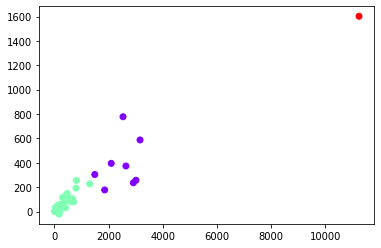

In [20]:
plt.scatter(np.array(clasterization['rev']).reshape((-1,1)), clasterization['op_in'], c=kmeans.labels_, cmap='rainbow')

In [21]:
clasterization['claster'] = kmeans.labels_

In [22]:
clasterization.claster.value_counts()

1    45
0     8
2     1
Name: claster, dtype: int64

I divide the data into two clusters in order to do different processing for them in the future.

In [23]:
clasterization = clasterization.drop(clasterization[(clasterization.claster == 1)].index)
Train_DF_Small = clasterization.loc[clasterization.claster == 0]
Train_DF_Small.drop('claster', axis = 1)
Train_DF_Mid = clasterization.loc[clasterization.claster == 2]
Train_DF_Mid.drop(columns = ['claster', 'rev', 'op_in'])
Train_DF_midlle = Train_DF[Train_DF['company_name'].isin(Train_DF_Mid.company_name)] 
Train_DF_small = Train_DF[Train_DF['company_name'].isin(Train_DF_Small.company_name)] 

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [25]:
def naive_model(data: pd.DataFrame, name_of_column: str) -> float:
    return data[name_of_column].iloc[-1]

In [26]:
def linear_model(data: pd.DataFrame, name_of_column: str):
    """Least squares Linear Regression."""
    model = LinearRegression().fit(np.array(data.Time[:]).reshape((-1,1)), data[name_of_column][:])
    next_value = model.coef_[0] * (data.Time[:].max() + 1) + model.intercept_ 
    return next_value

In [27]:
def company_cross_validation(data: pd.DataFrame, name_of_column: str, model, metrics, train_lenght: int=0, step: int=1, plot: bool=False) -> float:
    """Cross validation for one company data"""
    values_for_metric = {"test":[], "model":[]}
    len_of_data = len(data[name_of_column])
    if not train_lenght:
        train_lenght = int((len_of_data * 0.6)//1)
    for n in range(train_lenght + 1, len_of_data, step):
        train_data = data.iloc[: n]
        values_for_metric["model"].append(model(train_data, name_of_column))
        values_for_metric["test"].append(data[name_of_column][n])
    if plot:
        plt.figure(figsize=(20,10))
        plt.plot(values_for_metric["model"], label='Model')
        plt.plot(values_for_metric["test"], label='Test')
        plt.legend()
        plt.grid()
        plt.show()
    return metrics(values_for_metric["test"], values_for_metric["model"])

In [28]:
def companies_validation(data: pd.DataFrame, name_of_column: str, 
                        model, metrics, train_lenght: int=0, 
                        step: int=1, plot: bool=False) -> pd.DataFrame:
    """Cross validation for a few companies data"""
    validation = {}
    for company_name in data.company_name.unique():
        DF_of_one_company = data.loc[data.company_name == company_name] 
        DF_of_one_company['Time'] = np.arange(len(DF_of_one_company.date))
        DF_of_one_company = DF_of_one_company.reset_index(drop=True)
        validation[company_name] = company_cross_validation(DF_of_one_company, name_of_column, model, metrics)
    return pd.DataFrame.from_dict(validation, orient='index', columns=[name_of_column])

Find mse for naive model

In [ ]:
Validation_small_rev = companies_validation(Train_DF_small,'rev', naive_model, mean_absolute_error)
Validation_small_op_in = companies_validation(Train_DF_small,'op_in', naive_model, mean_absolute_error)
Validation_midlle_rev = companies_validation(Train_DF_midlle,'rev', naive_model, mean_absolute_error)
Validation_midlle_op_in = companies_validation(Train_DF_midlle,'op_in', naive_model, mean_absolute_error)

In [30]:
print(Validation_small_rev.mean()
    ,Validation_small_op_in.mean()
    ,Validation_midlle_rev.mean()
    ,Validation_midlle_op_in.mean(), sep='\n')

rev    306.893456
dtype: float64
op_in    249.094686
dtype: float64
rev    818.200013
dtype: float64
op_in    478.723102
dtype: float64


Find mse for Linear Regression model

In [ ]:
Validation_small_rev = companies_validation(Train_DF_small,'rev', linear_model, mean_absolute_error)
Validation_small_op_in = companies_validation(Train_DF_small,'op_in', linear_model, mean_absolute_error)
Validation_midlle_rev = companies_validation(Train_DF_midlle,'rev', linear_model, mean_absolute_error)
Validation_midlle_op_in = companies_validation(Train_DF_midlle,'op_in', linear_model, mean_absolute_error)


It can be seen that in both cases the error is quite large, and for the linear model everything is worse than for the naive one.


In [32]:
print(Validation_small_rev.mean()
    ,Validation_small_op_in.mean()
    ,Validation_midlle_rev.mean()
    ,Validation_midlle_op_in.mean(), sep='\n')

rev    983.335832
dtype: float64
op_in    424.698657
dtype: float64
rev    5076.525555
dtype: float64
op_in    2039.771363
dtype: float64


Test data. I do everything similarly to the training sample.

In [33]:
Test_DF = download_data(PATH_OF_TEST_DATA)

[[  274.6968975 ]
 [11246.84206484]
 [ 2461.66830095]]


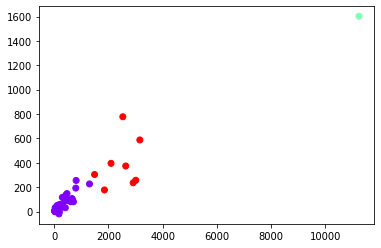

In [34]:
revenues = pd.DataFrame(Test_DF.groupby('company_name')['rev'].mean())
op_ins = pd.DataFrame(Test_DF.groupby('company_name')['op_in'].mean())
clasterization = pd.concat([revenues,op_ins], axis=1, join='inner').reset_index()
kmeans = KMeans(n_clusters=3) 
kmeans.fit(np.array(clasterization['rev']).reshape((-1,1)), clasterization['op_in'])
print(kmeans.cluster_centers_)
kmeans.labels_
plt.scatter(np.array(clasterization['rev']).reshape((-1,1)), clasterization['op_in'], c=kmeans.labels_, cmap='rainbow')

In [ ]:
clasterization['claster'] = kmeans.labels_
clasterization = clasterization.drop(clasterization[(clasterization.claster == 1)].index)
Test_DF_Small = clasterization.loc[clasterization.claster == 0]
Test_DF_Small.drop('claster', axis = 1)
Test_DF_Mid = clasterization.loc[clasterization.claster == 2]
Test_DF_Mid.drop(columns = ['claster', 'rev', 'op_in'])
Test_DF_midlle = Test_DF[Test_DF['company_name'].isin(Test_DF_Mid.company_name)] 
Test_DF_small = Test_DF[Test_DF['company_name'].isin(Test_DF_Small.company_name)]
Validation_small_rev = companies_validation(Train_DF_small,'rev', naive_model, mean_absolute_error)
Validation_small_op_in = companies_validation(Train_DF_small,'op_in', naive_model, mean_absolute_error)
Validation_midlle_rev = companies_validation(Train_DF_midlle,'rev', naive_model, mean_absolute_error)
Validation_midlle_op_in = companies_validation(Train_DF_midlle,'op_in', naive_model, mean_absolute_error) 

In [36]:
print(Validation_small_rev.mean()
    ,Validation_small_op_in.mean()
    ,Validation_midlle_rev.mean()
    ,Validation_midlle_op_in.mean(), sep='\n')

rev    306.893456
dtype: float64
op_in    249.094686
dtype: float64
rev    818.200013
dtype: float64
op_in    478.723102
dtype: float64


In [ ]:
Validation_small_rev = companies_validation(Train_DF_small,'rev', linear_model, mean_absolute_error)
Validation_small_op_in = companies_validation(Train_DF_small,'op_in', linear_model, mean_absolute_error)
Validation_midlle_rev = companies_validation(Train_DF_midlle,'rev', linear_model, mean_absolute_error)
Validation_midlle_op_in = companies_validation(Train_DF_midlle,'op_in', linear_model, mean_absolute_error) 

In [38]:
print(Validation_small_rev.mean()
    ,Validation_small_op_in.mean()
    ,Validation_midlle_rev.mean()
    ,Validation_midlle_op_in.mean(), sep='\n')

rev    983.335832
dtype: float64
op_in    424.698657
dtype: float64
rev    5076.525555
dtype: float64
op_in    2039.771363
dtype: float64


In the future, I want to try, firstly, to use more attributes, secondly, to use more complex models, and thirdly, to do different data processing for several clusters.

For the future

In [39]:
#or company_name in Train_DF_small.company_name.unique():
#   DF_of_one_company = Train_DF_small.loc[Train_DF_small.company_name == company_name] 
#   DF_of_one_company['Time'] = np.arange(len(DF_of_one_company.date))
#   new_row = dict(DF_of_one_company.iloc[-1])
#   new_row['rev'] = linear_model(DF_of_one_company, 'rev')
#   new_row['op_in'] = linear_model(DF_of_one_company, 'op_in')
#   new_row['date'] = new_row['date'] + pd.DateOffset(months=3)
#   new_row['Time'] = new_row['Time'] + 1
#   new_row = pd.DataFrame([new_row])
#   print(new_row)
#   Train_DF_small = pd.concat([Train_DF_small, new_row], ignore_index = True)


  company_name         rev       date       op_in  Time
0          APA  590.059758 2020-09-30 -367.791167    38
  company_name          rev       date       op_in  Time
0          CHK  1931.133741 2020-09-30 -186.096884    38
  company_name         rev       date       op_in  Time
0          DVN  1889.75392 2020-09-30 -205.666059    38
  company_name          rev       date      op_in  Time
0          EOG  3640.845113 2020-09-30  545.42121    38
  company_name         rev       date      op_in  Time
0          HES -429.091038 2020-09-30 -456.82646    38
  company_name         rev       date       op_in  Time
0          MRO  326.419626 2020-09-30 -387.392604    38
  company_name          rev       date      op_in  Time
0          MUR -1143.474824 2020-09-30 -101.76539    38
  company_name          rev       date       op_in  Time
0          OVV  1303.788056 2020-09-30  155.234708    38


<ipython-input-39-655ec4c21c84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_of_one_company['Time'] = np.arange(len(DF_of_one_company.date))
<ipython-input-39-655ec4c21c84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_of_one_company['Time'] = np.arange(len(DF_of_one_company.date))
<ipython-input-39-655ec4c21c84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [40]:
#Train_DF_Mid_APA = Train_DF.loc[Train_DF.company_name == 'APA']
#Train_DF_Mid_APA['Time'] = np.arange(len(Train_DF_Mid_APA.date))
#Train_DF_Mid_APA = Train_DF_Mid_APA.reset_index(drop=True)
#Train_DF_Mid_APA
#new = dict(Train_DF_Mid_APA.iloc[-1])
#new['rev'] = linear_model(Train_DF_Mid_APA, 'rev')
#new['op_in'] = linear_model(Train_DF_Mid_APA, 'op_in')
#new['date'] = new['date'] + pd.DateOffset(months=3)
#new['Time'] = new['Time'] + 1
#new = pd.DataFrame([new])
#Train_DF_Mid_APA = pd.concat([Train_DF_Mid_APA, new], ignore_index = True)
#model = LinearRegression().fit(np.array(Train_DF_Mid_APA.Time[:]).reshape((-1,1)), Train_DF_Mid_APA.rev[:])
#next = model.coef_[0]*38 + model.intercept_
#next

<ipython-input-40-c759420bedde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_DF_Mid_APA['Time'] = np.arange(len(Train_DF_Mid_APA.date))


590.0597583385488